# Observe Training Process
## Dependencies & Global Variables

In [26]:
import json
import matplotlib.pyplot as plt

In [ ]:
PATH_TO_MLA = './model_output/3_class_SETR_MLA/None.log.json'
PATH_TO_PUP = './model_output/3_class_SETR_PUP/None.log.json'

## Load Data

In [27]:
f        = open(PATH_TO_MLA)
data_mla = f.readlines()

g        = open(PATH_TO_PUP)
data_pup = g.readlines()

A function from transforming the none.log.json file into a dictionary with iterations and their corresponding loss values.

In [28]:
def from_txt_to_dict(data):
    logs = []
    for j in range(len(data)):
        if len(data[j]) <= (len(data[-1])+10):
            continue 
        a = data[j][1:-2].split(',')
        a = [i.strip() for i in a]
        a = [i.split(':') for i in a]
        for i in range(len(a)):
            a[i] = [a[i][0].strip(), a[i][1].strip()]
        for i in range(len(a)):
            subset = a[i]
            key    = subset[0].strip('"')
            try:
                value = float(subset[1].strip('"'))
            except ValueError:
                value = subset[1].strip('"')
            a[i] = [key, value]
        
        dic = {i[0]: i[1] for i in a}
        logs.append(dic)
    return logs

In [29]:
dic_mla = from_txt_to_dict(data_mla)

iterations_mla = [i['iter'] for i in dic_mla]
losses_mla     = [i['loss'] for i in dic_mla]

In [30]:
dic_pup = from_txt_to_dict(data_pup)

iterations_pup = [i['iter'] for i in dic_pup]
losses_pup     = [i['loss'] for i in dic_pup]

## Plotting

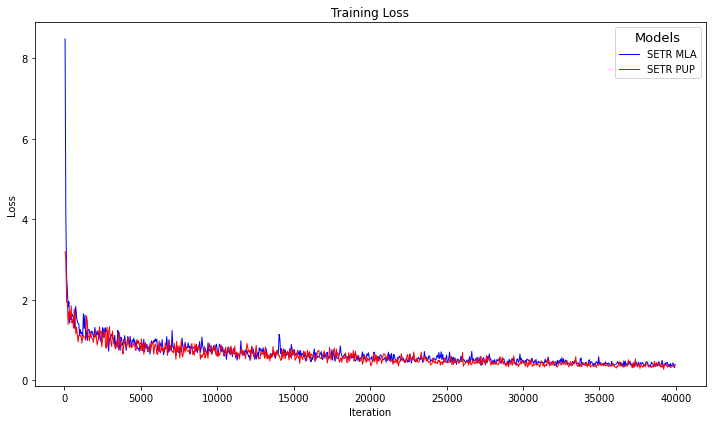

In [31]:
plt.figure(figsize=(10,6), tight_layout=True)

plt.plot(iterations_mla, losses_mla, 'b-', linewidth=1)
plt.plot(iterations_pup, losses_pup, 'r-', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend(title='Models', title_fontsize=13, labels=['SETR MLA', 'SETR PUP'])